##### Quick Decision Trees with Store Data
###### Author: Desi Nikolova
###### Date: 27th June, 2024

In [1]:

### Load the dataset 
import pandas as pd
df = pd.read_csv('GroceryDataset.csv')
df.head()
df.columns
df.dtypes
columns = df.columns

#Convert price to float 
s = pd.Series(df['Price'], dtype="string")
df['Price'] = s
df['Price'].isna().sum()

def removeCurrency(x):
    #x = str(x)
    if pd.isna(x):
        return "0"
    x = x.lstrip('$')
    return x
df['Price'] = df['Price'].apply(removeCurrency)

s = pd.Series(df['Price'], dtype="float")
df['Price'] = s

#Encode all variables 
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#one_hot_encoded = enc.fit_transform(df[['Sub Category']])
#one_hot_df = pd.DataFrame(one_hot_encoded, 
                          #columns=['Sub Category'])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sub Category'] = labelencoder.fit_transform(df['Sub Category'])
df['Sub Category'] = labelencoder.fit_transform(df['Sub Category'])
df['Discount']


X = df[['Sub Category']]
y = df[['Discount']]
#X = df


In [2]:
df.dtypes

Sub Category            int64
Price                  object
Discount               object
Rating                 object
Title                  object
Currency               object
Feature                object
Product Description    object
dtype: object

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=50, random_state=42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes=3, 
                                    random_state=0)
classifier.fit(X_train, y_train)
pred_y = classifier.predict(X_test)
#print(classification_report(y_test,pred_y))
#accuracy_score(y_test,pred_y)

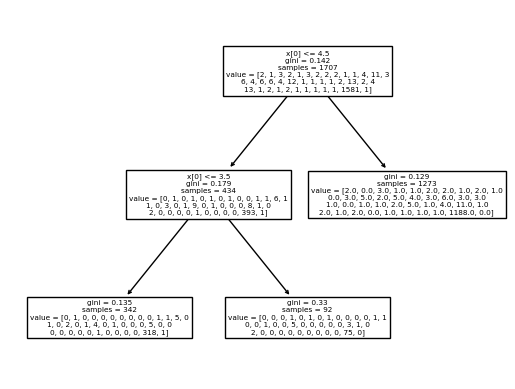

In [4]:
from matplotlib import pyplot as plt
from sklearn import tree
tree.plot_tree(classifier)
plt.show()
